# C6.2 Sensor: Mach-Zehnder interferometer (MZI)
Jeg Vet

huangzw29@mail2.sysu.edu.cn

2022-04-05

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sp

In [17]:
with open("Input/temperature.tsv", "a") as f:
    for i in np.arange(0, 22):
        f.write(str(i*5)+"\t"+str(25+i*0.5)+"\t"+str(35-i*0.5)+"\t"+"round_2"+"\n")
    f.close

In [22]:
def fitplot(df, par, xlab="x", ylab="y", deg=1, result_path="Output/fit.png"):
    '''
    df: dataframe
    par: {"x": "", "y": ""}
    deg: fit degree
    '''
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    # fit
    func = np.polyfit(df[par["x"]], df[par["y"]], deg=deg)
    x_dense = np.linspace(df[par["x"]].min(), df[par["x"]].max(), 50)
    reg = np.polyval(func, x_dense)
    r = np.corrcoef(df[par["x"]], df[par["y"]])[0,1]
    coef_1, coef_2 = tuple(func)
    plt.figure(figsize= (9, 6))
    plt.scatter(df[par["x"]], df[par["y"]], color='lightcoral')
    plt.plot(x_dense, reg, color='lightseagreen', 
                            label='Fit. \ny = {:.4f}x + {:.4f}\nr = {:.8f}'
                            .format(coef_1, coef_2, r))    
    sns.regplot(x=df[par["x"]], y=df[par["y"]], color = 'lightseagreen', scatter = False)                          
    plt.legend()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    # plt.title(y=-0.17)
    plt.savefig(result_path, bbox_inches = 'tight', dpi=300)   

In [32]:
df1 = pd.read_csv("Input/pressure.csv", sep=",")
df2 = pd.read_csv("Input/temperature.csv", sep=",")

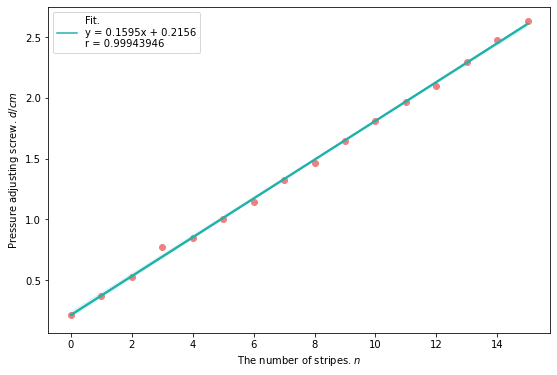

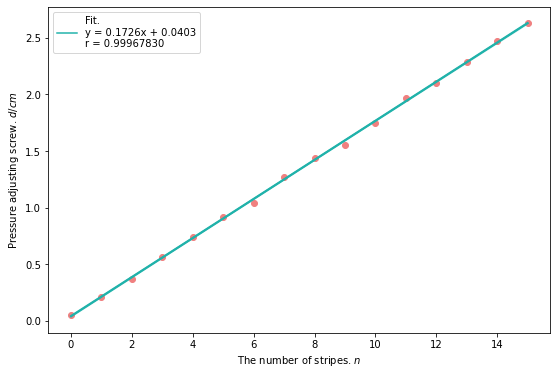

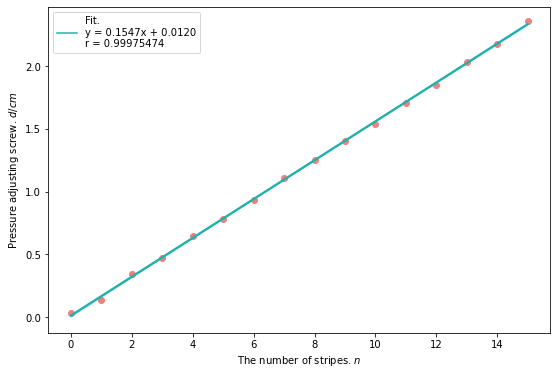

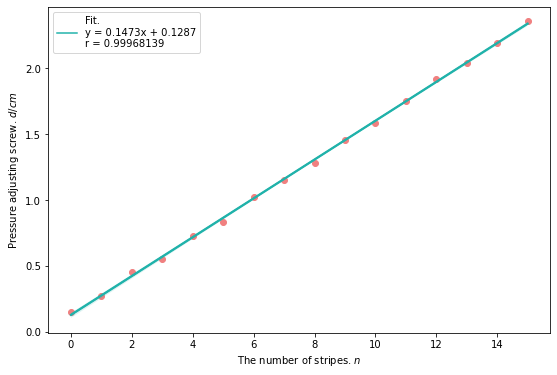

In [36]:
for i in ["round_1", "round_2"]:
    for pm in ["plus", "minus"]:
        fitplot(df1[df1.label == i], 
                par = {"x": "n", "y": pm}, 
                xlab ="The number of stripes. $n$", ylab = "Pressure adjusting screw. $d/cm$", 
                result_path = "Output/Pressure/"+i+"-"+pm+".png")

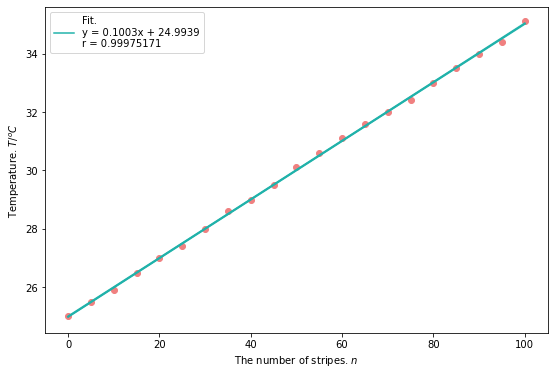

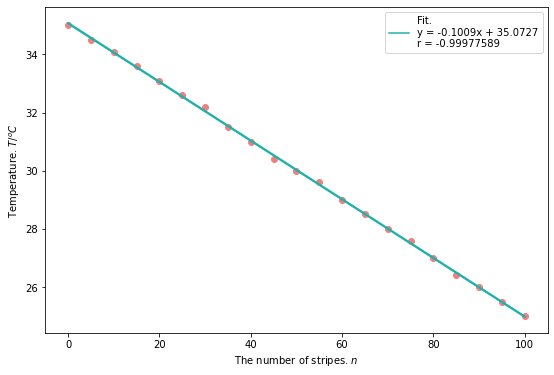

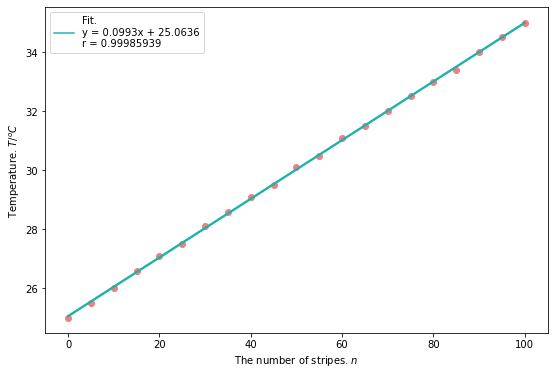

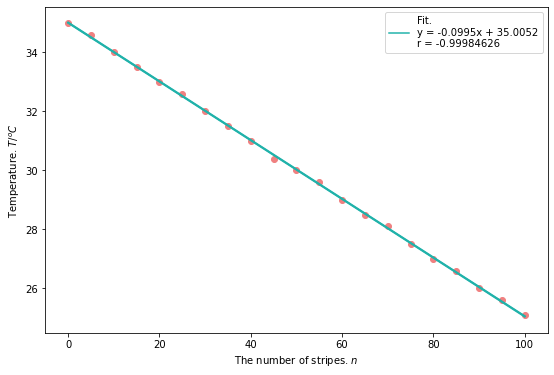

In [38]:
for i in ["round_1", "round_2"]:
    for pm in ["plus", "minus"]:
        fitplot(df2[df2.label == i], 
                par = {"x": "n", "y": pm}, 
                xlab ="The number of stripes. $n$", ylab = "Temperature. $T/^oC$", 
                result_path = "Output/Temperature/"+i+"-"+pm+".png")